<a href="https://colab.research.google.com/github/ylmgrbzz/SMA-30-100-Intersection-Indicator-and-Auto-Draw-Support-Resistance/blob/main/SMA_30_100_Intersection_Indicator_and_Auto_Draw_Support_Resistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas-ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 7.2 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=3523820c8547c036535b53aa9fb6b8e60a9f20c771b2ae15686c976160628c9d
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_datareader.data as web
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

plt.style.use('fivethirtyeight')
yf.pdr_override()

In [4]:
stocksymbols = ['EREGL.IS'] 
startdate = date(2017,8,4) 
end_date = date.today() 
print(end_date) 

2022-10-13


In [5]:
def getMyPortfolio(stocks = stocksymbols ,start = startdate , end = end_date):
    data = web.get_data_yahoo(stocks , data_source='yahoo' , start = start ,end= end ) 
    return data

In [6]:
data = getMyPortfolio(stocksymbols)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-04 00:00:00+03:00,8.060000,8.230000,8.060000,8.190000,4.027274,17502157
2017-08-07 00:00:00+03:00,8.230000,8.310000,8.220000,8.240000,4.051861,11315214
2017-08-08 00:00:00+03:00,8.270000,8.300000,8.140000,8.140000,4.002688,10878642
2017-08-09 00:00:00+03:00,8.140000,8.280000,8.030000,8.030000,3.948598,22566283
2017-08-10 00:00:00+03:00,8.040000,8.150000,7.800000,7.800000,3.835500,16626833
...,...,...,...,...,...,...
2022-10-06 00:00:00+03:00,30.760000,30.860001,30.200001,30.320000,30.320000,55272231
2022-10-07 00:00:00+03:00,30.360001,30.879999,30.120001,30.219999,30.219999,65201661
2022-10-10 00:00:00+03:00,30.299999,30.940001,30.219999,30.559999,30.559999,68198377


In [7]:
data['SMA 30'] = ta.sma(data['Close'],30)
data['SMA 100'] = ta.sma(data['Close'],100)

In [8]:
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])

In [9]:
data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)
data


,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price
Date,,,,,,,,,,
2017-08-04 00:00:00+03:00,8.060000,8.230000,8.060000,8.190000,4.027274,17502157,NaN,NaN,NaN,NaN
2017-08-07 00:00:00+03:00,8.230000,8.310000,8.220000,8.240000,4.051861,11315214,NaN,NaN,NaN,NaN
2017-08-08 00:00:00+03:00,8.270000,8.300000,8.140000,8.140000,4.002688,10878642,NaN,NaN,NaN,NaN
2017-08-09 00:00:00+03:00,8.140000,8.280000,8.030000,8.030000,3.948598,22566283,NaN,NaN,NaN,NaN
2017-08-10 00:00:00+03:00,8.040000,8.150000,7.800000,7.800000,3.835500,16626833,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-10-06 00:00:00+03:00,30.760000,30.860001,30.200001,30.320000,30.320000,55272231,30.198667,29.6634,NaN,NaN
2022-10-07 00:00:00+03:00,30.360001,30.879999,30.120001,30.219999,30.219999,65201661,30.236667,29.6392,NaN,NaN
2022-10-10 00:00:00+03:00,30.299999,30.940001,30.219999,30.559999,30.559999,68198377,30.272000,29.6280,NaN,NaN


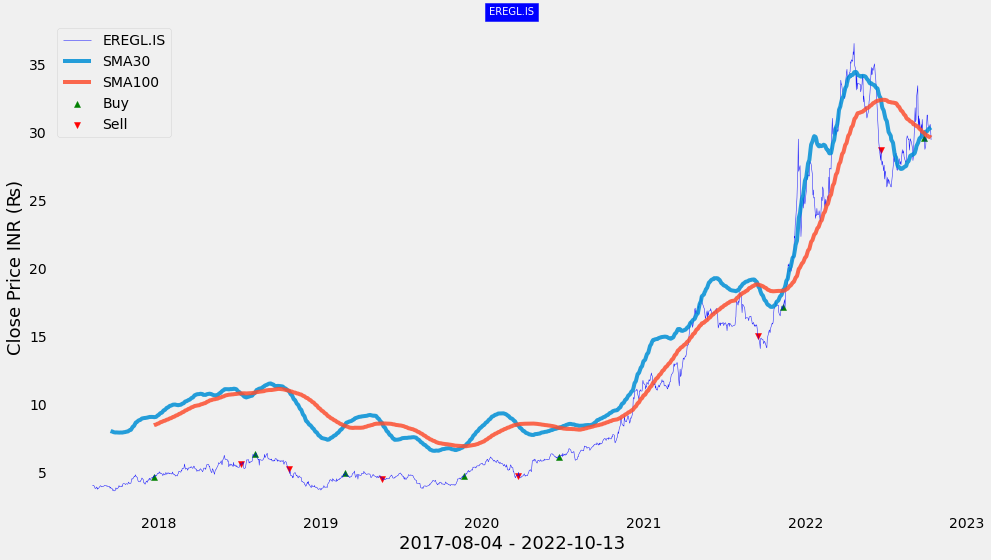

In [11]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['Adj Close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(data.index , data['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] ,fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [12]:
pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

In [17]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:

import yfinance 


In [22]:
name = 'SISE.IS'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2022-05-15", end="2022-10-6")
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [23]:
df.head()

,Date,Open,High,Low,Close
Date,,,,,
2022-05-16 00:00:00+03:00,738290.875,19.298671,19.396734,18.906422,18.926033
2022-05-17 00:00:00+03:00,738291.875,19.171189,19.808596,19.073128,19.524214
2022-05-18 00:00:00+03:00,738292.875,19.524214,19.808596,19.435958,19.524214
2022-05-20 00:00:00+03:00,738294.875,19.494795,19.690920,19.043709,19.043709
2022-05-23 00:00:00+03:00,738297.875,19.122158,19.141771,18.553397,18.975065


In [24]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
  return support
def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]
  return resistance

In [25]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))

In [26]:
def plot_all():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
    plt.title(name)
  fig.show()

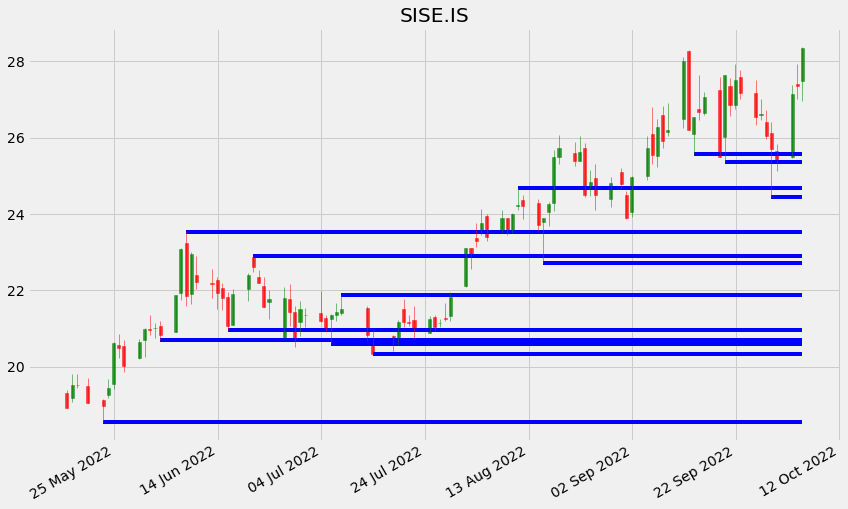

In [27]:
plot_all()

In [28]:
s =  np.mean(df['High'] - df['Low'])

In [29]:

def isFarFromLevel(l):
   return np.sum([abs(l-x) < s  for x in levels]) == 0

In [30]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    l = df['Low'][i]
    if isFarFromLevel(l):
      levels.append((i,l))
  elif isResistance(df,i):
    l = df['High'][i]
    if isFarFromLevel(l):
      levels.append((i,l))

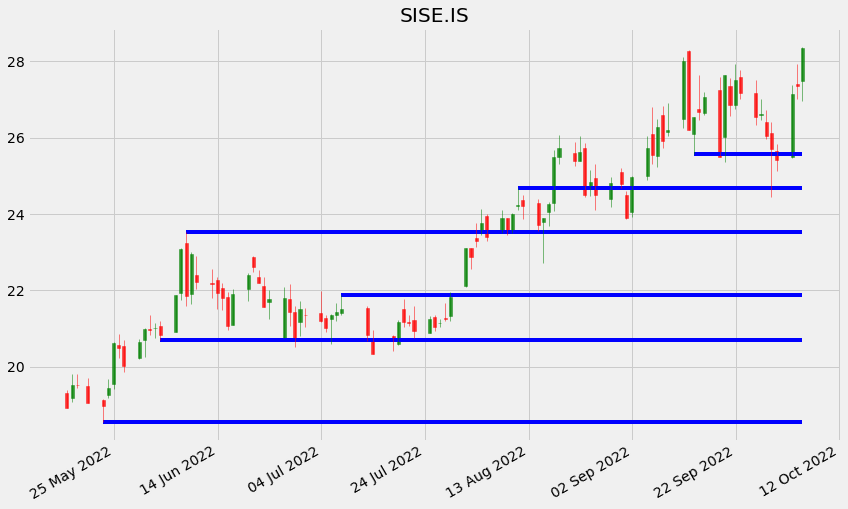

In [31]:
plot_all()